# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание <a id="to"></a>

[1. Изучение общей информации](#to1)
<br/>[2. Предобработка данных](#to2)
<br/> &ensp; [2.1 Предобработка параметров](#to21)
<br/> &ensp; [2.2 Добавление новых параметров](#to22)
<br/>[3. Исследовательский анализ данных](#to3)
<br/> &ensp; [3.1 Анализ параметров](#to31)
<br/> &ensp; [3.2 Оценка времени продажи квартиры](#to32)
<br/> &ensp; [3.3 Оценка факторов влияющих на стоимость квартиры](#to33)
<br/> &ensp; [3.4 Средняя цена квадратного метра в ТОП-10 населённых пунктов](#to34)
<br/> &ensp; [3.5 Средняя цена километра до центра города](#to35)
<br/>[4. Общий вывод](#to4)

## 1. Изучение общей информации
<a id="to1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Константин/Проекты обучение/Исследование недвижимости/real_estate_data.csv', sep='\t')

In [2]:
# общая информация о датафрейме
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## 2. Предобработка данных <a id="to2"></a>

### 2.1 Предобработка параметров <a id="to21"></a>

[Содержание](#to)

In [4]:
#считаю сколько в каждой колонке пропусков, для выявления колонок которые нуждаются в предобработке
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
# создал свою функцию для отображения основных параметров
def raw(df,bin=30):
    print('Количество пропусков в столбце: ',df.isna().sum())
    print(f'Процент пропусков в столбце: {df.isna().mean():.1%}')
    print('Минимальное значение: ', df.min())
    print('Максимальное значение: ', df.max())
    df.plot(bins=bin,kind='hist',legend=True)
    plt.title('Распределение значений параметра', fontsize= 12, fontweight='bold')
    plt.xlabel('Значение параметра')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Число корзин в гистограмме: ', bin)
    print()
    df_sort = sorted(df.unique())
    if df.nunique()<51:
        print(df_sort)
    else:
        print('Количество значений параметра больше  50')

#### 2.1.1 Параметр "Высота потолков" <a id="to211"></a>

[Содержание](#to)

Количество пропусков в столбце:  9195
Процент пропусков в столбце: 38.8%
Минимальное значение:  1.0
Максимальное значение:  100.0


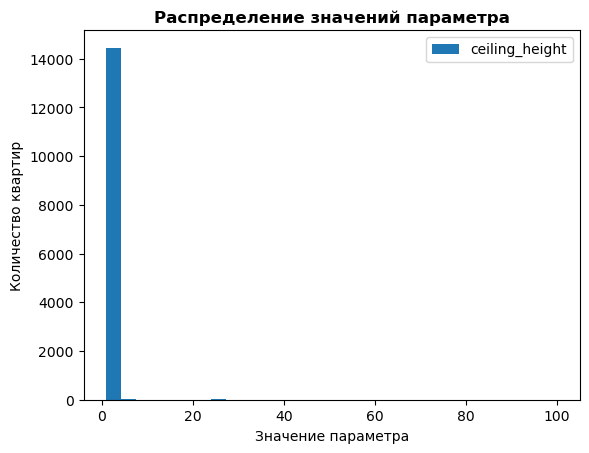

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [6]:
raw(data['ceiling_height'])

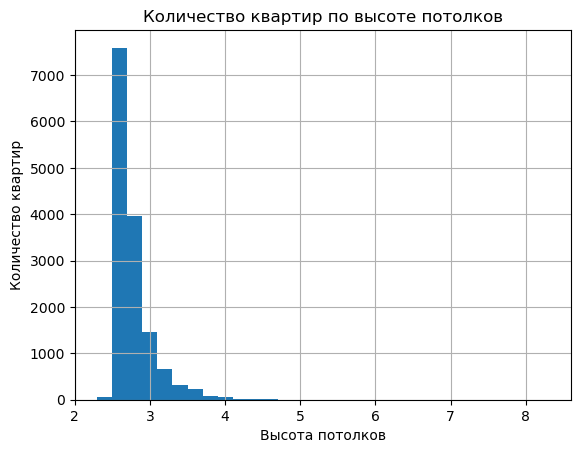

In [7]:
# определяю диапазон в котором находится большинство значений столбца
data['ceiling_height'].hist(bins=30,range=(2.3,8.3))
plt.title('Количество квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

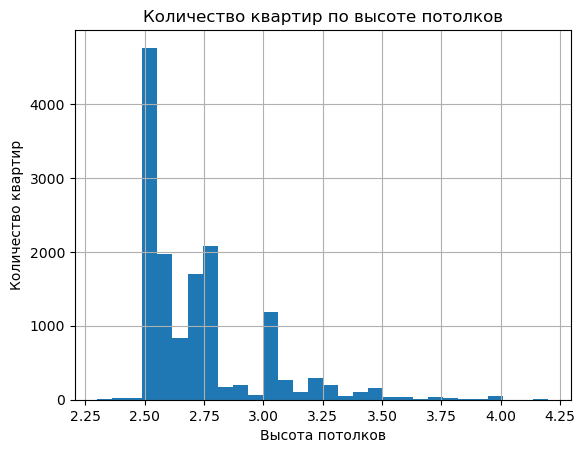

In [8]:
data['ceiling_height'].hist(bins=30,range=(2.3,4.2))
plt.title('Количество квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

In [9]:
# считаю сколько останется строк после удаления крайних малых значений
data[data['ceiling_height'].between(2,4.2) | data['ceiling_height'].isna()]['total_images'].count()

23639

In [10]:
# отсекаю данные с аномально низкими и аномально высокими значениями, или значения которых крайне мало
data = data[data['ceiling_height'].between(2,4.2) | data['ceiling_height'].isna()]

In [11]:
# считаю сколько строк осталось после предобработки
len(data)

23639

***Вывод: есть аномально низкие и аномально большие значения высоты потолков. Так же очень большой процент пропусков. Видимо люди просто не знали этот параметр своей квартиры. Оставил как есть, от проекта к проекту высота может меняться не предсказуемо. Поэтому считаю, что меня значение на среднестатистическое будет не корректно.***

#### 2.1.2 Параметр "Всего этажей в доме" <a id="to212"></a>

[Содержание](#to)

Количество пропусков в столбце:  86
Процент пропусков в столбце: 0.4%
Минимальное значение:  1.0
Максимальное значение:  60.0


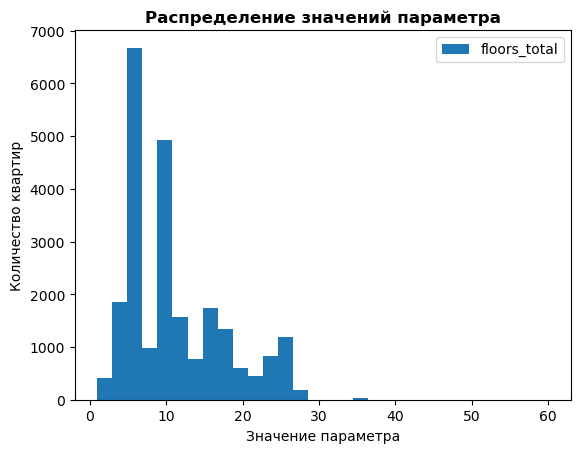

Число корзин в гистограмме:  30

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 52.0, 60.0]


In [12]:
raw(data['floors_total'])

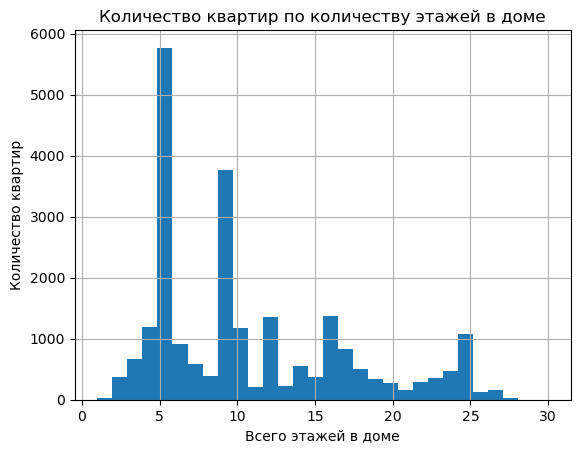

In [13]:
# график без аномальных значений
data['floors_total'].hist(bins=30,range=(1,30))
plt.title('Количество квартир по количеству этажей в доме')
plt.xlabel('Всего этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

In [14]:
# удаляю пропуски
data = data.dropna(subset=['floors_total'])
print(data['floors_total'].isna().sum())

0


In [15]:
# отсекаю данные с аномально низкими и аномально высокими значениями, или значения которых крайне мало
data = data.query('0<floors_total<31')

In [16]:
# считаю сколько строк осталось после предобработки
len(data)

23523

***Вывод: столбец 'floors_total' содержит очень мало пропусков. Данные по графику выглядят правдоподобно. Поэтому принял решение о удалении строк с пропусками. Так как строки с очень большими значениями могут негативно повлиять на результаты, удалил их из данных. Данных строк очень мало, их отсутствие на релевантность результатов не повлияет.***

#### 2.1.3 Параметр "Жилая площадь" <a id="to213"></a>

[Содержание](#to)

Количество пропусков в столбце:  1865
Процент пропусков в столбце: 7.9%
Минимальное значение:  2.0
Максимальное значение:  409.7


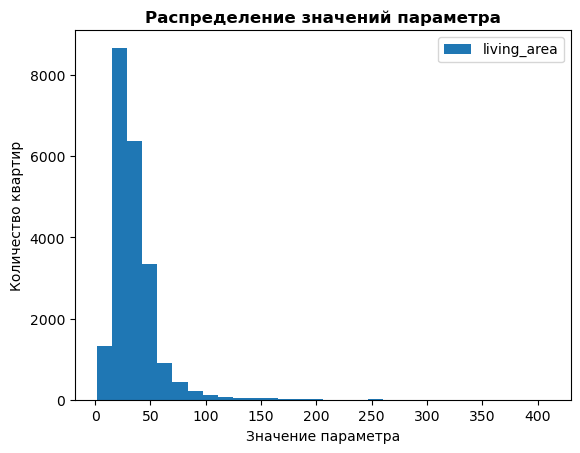

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [17]:
raw(data['living_area'])

In [18]:
# округляю значения столбца, до одной десятой
data['living_area'] = round(data['living_area'],1)

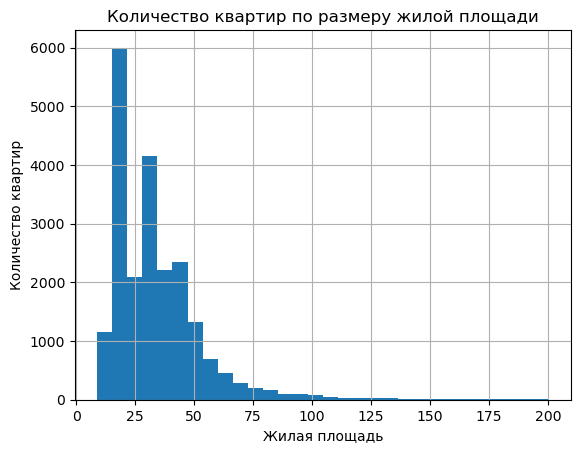

In [19]:
# определяю границы основной массы данных
data['living_area'].hist(bins=30,range=(9,200))
plt.title('Количество квартир по размеру жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

In [20]:
# удаляю высокие значения которых крайне мало для того чтобы они не влияли в будущем на исследование
data = data[data['living_area'].between(9,200) | data['living_area'].isna()]

In [21]:
# считаю сколько строк осталось после предобработки
len(data)

23480

***Вывод: в столбце 'living_area' был значительный не критичный объём пропусков. Согласно гистограмме значения столбца выглядят правдоподобно. Очень маленьких значений мало и они могут соответствовать продаже одной жилой комнаты, а очень большие квартиры могут соответствовать дорогим пентхаусам. Их количество тоже не значительно. Так же при просмотре уникальных значений было выявлено, что некоторые значения были указаны до тысячных долей. Для удобство все значения обнулил до десятых. Крайние значения число которых было очень маленьким, удалил, чтобы в будущем они не влияли на качество исследования.***

#### 2.1.4 Параметр "Апартаменты" <a id="to214"></a>

[Содержание](#to)

In [22]:
# определяю список уникальных значений
print(data['is_apartment'].unique())

[nan False True]


In [23]:
# меняю пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[False  True]


In [24]:
# считаю сколько строк осталось после предобработки
len(data)

23480

***Вывод: в столбце 'is_apartment' находятся булевы значения. Очевидно, что если продаются апартаменты человек делает об этом отметку. Если продаются не апартаменты, то человек либо отмечает что 'не апартаменты', либо игнорирует данную позицию, что и приводит к пропускам. Поэтому решил все пропуски и отрицательные значения заменить на булево значение False.***

#### 2.1.5 Параметр "Площадь кухни" <a id="to215"></a>

[Содержание](#to)

Количество пропусков в столбце:  2213
Процент пропусков в столбце: 9.4%
Минимальное значение:  1.3
Максимальное значение:  107.0


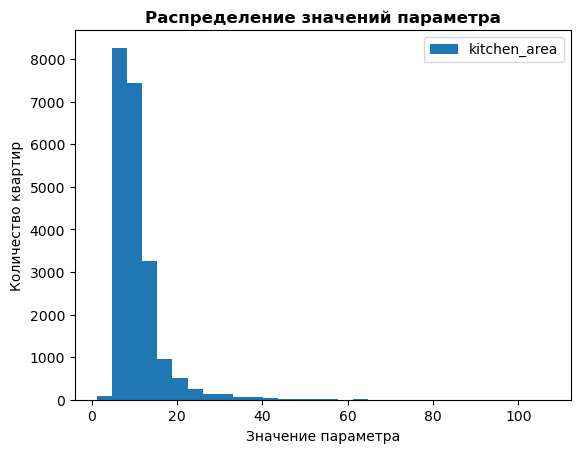

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [25]:
raw(data['kitchen_area'])

In [26]:
# привёл значения в столбце к одной десятой, для удобства
data['kitchen_area'] = round(data['kitchen_area'],1)

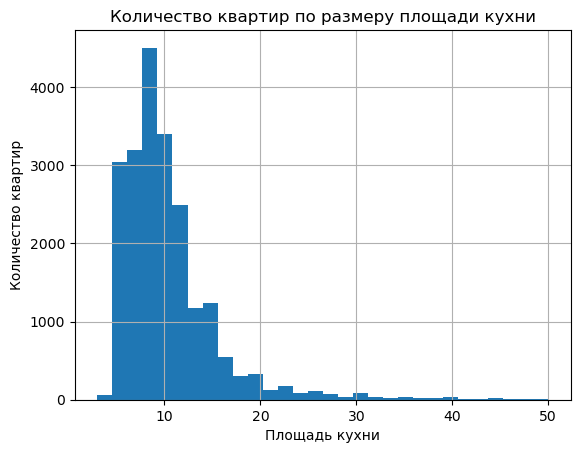

In [27]:
# оцениваю границы основных данных
data['kitchen_area'].hist(bins=30, range=(3,50))
plt.title('Количество квартир по размеру площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

In [28]:
# оценка потерь в диапазоне большинства значений от общего числа для расчёта медианы
data[data['kitchen_area'].between(3,50) | data['kitchen_area'].isna()]['total_images'].count()

23431

In [29]:
# удаляю высокие значения которых крайне мало для того чтобы они не влияли в будущем на исследование
data = data[data['kitchen_area'].between(3,50) | data['kitchen_area'].isna()]

In [30]:
# считаю сколько строк осталось после предобработки
len(data)

23431

***Вывод: столбец 'kitchen_area' имел не критичное количество пропусков, но в целом их количество могло сказаться на результатах исследования. Гистограмма имеет правдоподобный вид значений. Кроме того в значениях были замечены значения с указанными сотыми. Поэтому я округлил значения до десятых, для удобства. Так как данный параметр индивидуален в зависимости от проекта дома и в целом по каждой квартире, считаю не правильным высчитывать его статистически и заменять пропуски на это значение. Причиной возникновения пропусков, могло стать внесение неверных значений или просто продавцы проигнорировали данный пункт при заполнении. Убрал из таблицы крайне низкие и крайне высокие значения, так как их мало, но они могли повлиять на результаты исследования.***

#### 2.1.6 Параметр "Число балконов" <a id="to216"></a>

[Содержание](#to)

Количество пропусков в столбце:  11388
Процент пропусков в столбце: 48.6%
Минимальное значение:  0.0
Максимальное значение:  5.0


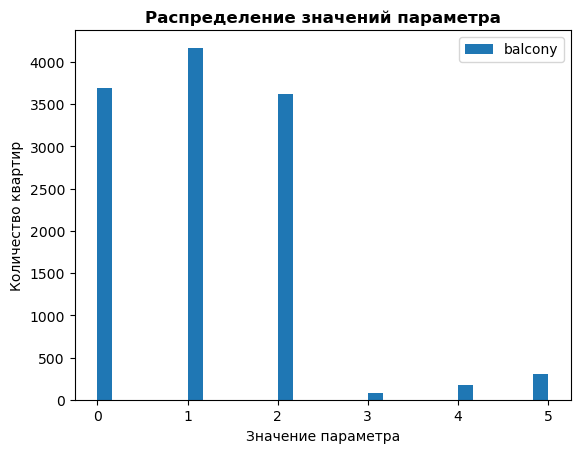

Число корзин в гистограмме:  30

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [31]:
raw(data['balcony'])

In [32]:
# подсчитал количество строк со значениями 3, 4, 5
# заменил эти значения на значения 1
print(len(data.query('balcony>2')))
balcony_false = [3,4,5]
data['balcony'] = data['balcony'].replace(balcony_false,1)

559


In [33]:
# считаю сколько строк осталось после предобработки
len(data)

23431

***Вывод: выглядит аномальным рост количество балконов, начиная с 3 и до 5. Столько балконов в квартире даже элитных категориях  маловероятно. Тем более квартир из этих категорий крайне мало. Предполагаю что люди указали по ошибке не количество балконов, а квадратные метры, площадь балконов. Поэтому решаю все эти аномальные значения с тремя балконами и больше перевести в категорию 1 балкон, переименовав значения из этих строк на 1.***

#### 2.1.7 Параметр "Название населённого пункта" <a id="to217"></a>

[Содержание](#to)

In [34]:
# определяю число строк дубликатов, количество пропусков и вывожу на экран список уникальных значений
print(data.duplicated().sum())
print(data['locality_name'].isna().sum())
print(data['locality_name'].unique())

0
48
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новы

In [35]:
# удаляю пропуски
data = data.dropna(subset=['locality_name'])
print(data['locality_name'].isna().sum())

0


In [125]:
# привёл список к нижнему регистру и вывел список уникальных значений повторно
data['locality_name'] = data['locality_name'].str.lower()
print('''
Cписок с нижним регистром:
''')
print(data['locality_name'].unique())


Cписок с нижним регистром:

['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'коммунар' 'колпино' 'гатчина' 'кировск' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'поселок молодцово'
 'поселок городского типа кузьмоловский' 'выборг' 'павловск'
 'деревня пикколово' 'сестрорецк' 'посёлок аннино'
 'поселок городского типа ефимовский' 'посёлок плодовое'
 'деревня заклинье' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'всеволожск' 'сланцы' 'ивангород' 'кингисепп' 'поселок новый свет'
 'деревня новое девяткино' 'поселок романовка' 'посёлок бугры'
 'сосновый бор' 'отрадное' 'село павлово' 'село копорье' 'волосово'
 'кудрово' 'посёлок новый свет' 'посёлок стрельна' 'бокситогорск'
 'кронштадт' 'посёлок александровская' 'пикалёво' 'поселок терволово'
 'кириши' 'подпорожье' 'посёлок городского типа сиверский'
 'поселок сельцо' 'посёлок городского типа вырица' 'деревня кипень'
 'посел

In [126]:
# вывожу список из 30 населённых пунктов с самым большим числом повторений
print('Список населённых пунктов по количеству:\n', data['locality_name'].value_counts().head(30))

Список населённых пунктов по количеству:
 санкт-петербург              13154
посёлок шушары                 423
посёлок мурино                 334
пушкин                         331
колпино                        326
посёлок парголово              290
кудрово                        261
петергоф                       174
сестрорецк                     171
красное село                   163
гатчина                        158
выборг                         138
всеволожск                     123
кингисепп                       74
посёлок бугры                   68
посёлок металлострой            64
сланцы                          62
волхов                          53
ломоносов                       49
деревня новое девяткино         45
сертолово                       40
посёлок стрельна                40
тихвин                          38
павловск                        37
кириши                          36
никольское                      35
сосновый бор                    35
городской пос

In [127]:
# удаляю неявные дубликаты и вывожу последний список снова, чтобы оценить изменения
duplicates = ['мурино','поселок мурино']
data['locality_name'] = data['locality_name'].replace(duplicates,'посёлок мурино')
data['locality_name'] = data['locality_name'].replace('деревня кудрово','кудрово')
data['locality_name'] = data['locality_name'].replace('поселок коммунары' ,'коммунар')
data['locality_name'] = data['locality_name'].replace('поселок бугры' ,'посёлок бугры')

print('Список населённых пунктов по количеству(новый):\n', data['locality_name'].value_counts().head(30))

Список населённых пунктов по количеству(новый):
 санкт-петербург              13154
посёлок шушары                 423
посёлок мурино                 334
пушкин                         331
колпино                        326
посёлок парголово              290
кудрово                        261
петергоф                       174
сестрорецк                     171
красное село                   163
гатчина                        158
выборг                         138
всеволожск                     123
кингисепп                       74
посёлок бугры                   68
посёлок металлострой            64
сланцы                          62
волхов                          53
ломоносов                       49
деревня новое девяткино         45
сертолово                       40
посёлок стрельна                40
тихвин                          38
павловск                        37
кириши                          36
никольское                      35
сосновый бор                    35
городс

In [39]:
# считаю сколько строк осталось после предобработки
all_end = len(data)
print(all_end)

23383


***Вывод: сразу провёл поиск полных дубликатов в таблице. Таких не нашлось. Пропусков в столбце оказалось мало. При выводе списка уникальных значений, выяснилось что в названиях встречаются символы верхнего регистра, чтобы сразу исключить эту причину образования дубликатов, привёл все значения столбца к нижнему регистру. Нашёл 30 самых повторяющихся населённых пунктов. Самое маленькое значение в списке оказалось 65. Считаю что даже если какие то дубликаты и появятся в остальном списке, то они не скажутся существенно на вычислениях. При изучении значений столбца, нашёл несколько дубликатов. Некоторые населённые пункты раньше были деревней, но недавно стали городом. Провёл замену данных значений на эталонное. Было ещё несколько совпадений, но не подтвердилось. Такие населённые пункты действительно есть. В виду того, что пропусков мало, решил удалить строки с пропусками.***

#### 2.1.8 Параметр "Расстояние до ближайшего аэропорта" <a id="to218"></a>

[Содержание](#to)

Количество пропусков в столбце:  5503
Процент пропусков в столбце: 23.5%
Минимальное значение:  0.0
Максимальное значение:  84869.0


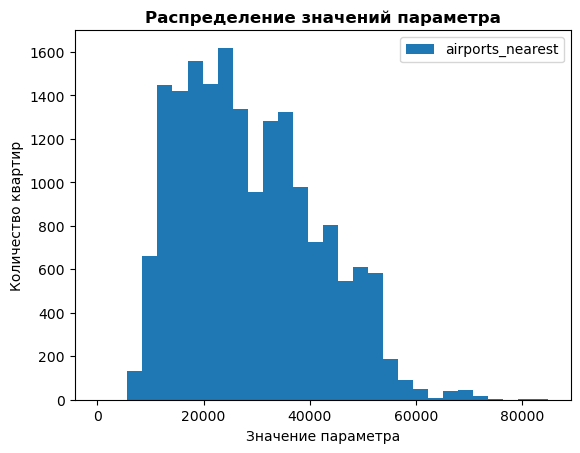

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [40]:
raw(data['airports_nearest'])

In [41]:
# произвожу оценку: в каких населённых пунктах отмечают расстояние до аэропорта
airports_nearest_data = data.query('airports_nearest>0')
airports_nearest_pivot = airports_nearest_data.pivot_table(index='locality_name', values='airports_nearest',aggfunc='count')
print(airports_nearest_pivot)

                         airports_nearest
locality_name                            
зеленогорск                            24
колпино                               337
красное село                          173
кронштадт                              93
ломоносов                             132
павловск                               38
петергоф                              201
поселок лисий нос                       1
посёлок александровская                 2
посёлок белоостров                      1
посёлок левашово                        1
посёлок лисий нос                       2
посёлок металлострой                   66
посёлок молодёжное                      5
посёлок парголово                     327
посёлок песочный                        4
посёлок петро-славянка                  1
посёлок понтонный                      20
посёлок репино                          4
посёлок сапёрный                        6
посёлок стрельна                       43
посёлок усть-ижора                

In [128]:
# перевожу значения столбца из метров в километры
data['airports_nearest'] = data['airports_nearest'][data['airports_nearest']>=0]/1000
data['airports_nearest'] = data['airports_nearest'][data['airports_nearest']>=0].astype('int')
print(data['airports_nearest'].head())

0    0.0
1    0.0
2    0.0
4    0.0
5    NaN
Name: airports_nearest, dtype: float64


In [43]:
# считаю сколько строк осталось после предобработки
len(data)

23383

***Вывод: при проверке в столбце 'airports_nearest' нашёл почти 25 процентов пропусков. Появилась версия, что система в малых городах, которые находятся на определённом удалении от аэропорта, не определяет этот параметр и оставляет его пустым. После того как сделал сводную таблицу по городам оказалось, что среди 300 населённых пунктах, расстояние аэропорта указано только у 26. Версия подтвердилась. Пришёл к выводу, что рядом с этими населёнными пунктами нет аэропорта. Поэтому все пропуски оставил как есть. Перевёл значение в километры и округлил их до целого.***

#### 2.1.9 Параметр "Расстояние до центра города" <a id="to219"></a>

[Содержание](#to)

Количество пропусков в столбце:  5483
Процент пропусков в столбце: 23.4%
Минимальное значение:  181.0
Максимальное значение:  65968.0


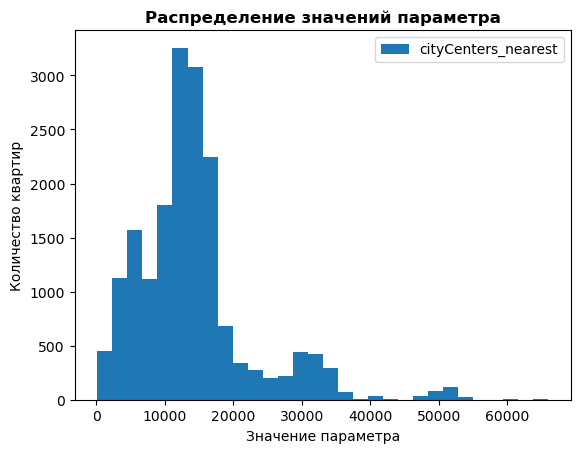

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [44]:
raw(data['cityCenters_nearest'])

In [45]:
# произвожу оценку: в каких населённых пунктах отмечают расстояние до центра города
cityCenters_nearest_data = data.query('cityCenters_nearest>0')
cityCenters_nearest_pivot = cityCenters_nearest_data.pivot_table(index='locality_name', values='cityCenters_nearest',aggfunc='count')
print(cityCenters_nearest_pivot)

                         cityCenters_nearest
locality_name                               
зеленогорск                               24
колпино                                  337
красное село                             173
кронштадт                                 93
ломоносов                                132
павловск                                  38
петергоф                                 201
поселок лисий нос                          1
посёлок александровская                    2
посёлок белоостров                         1
посёлок левашово                           1
посёлок лисий нос                          2
посёлок металлострой                      66
посёлок молодёжное                         5
посёлок парголово                        327
посёлок песочный                           4
посёлок петро-славянка                     1
посёлок понтонный                         20
посёлок репино                             4
посёлок сапёрный                           6
посёлок ст

In [47]:
# привожу значения к целому
data['cityCenters_nearest'] = data['cityCenters_nearest'][data['cityCenters_nearest']>=0].astype('int')
print(data['cityCenters_nearest'].head())

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64


In [48]:
# считаю сколько строк осталось после предобработки
len(data)

23383

***Вывод: по результату предобработки выявлено 23 процента пропусков. Выяснил что по аналогии с предыдущим параметром система его не определяет в удалённых от Питера городах. Оставил без изменений. Привёл значения столбца к целому значению, для удобства.***

#### 2.1.10 Параметр "Число парков в радиусе 3 км." <a id="to2110"></a>

[Содержание](#to)

Количество пропусков в столбце:  5482
Процент пропусков в столбце: 23.4%
Минимальное значение:  0.0
Максимальное значение:  3.0


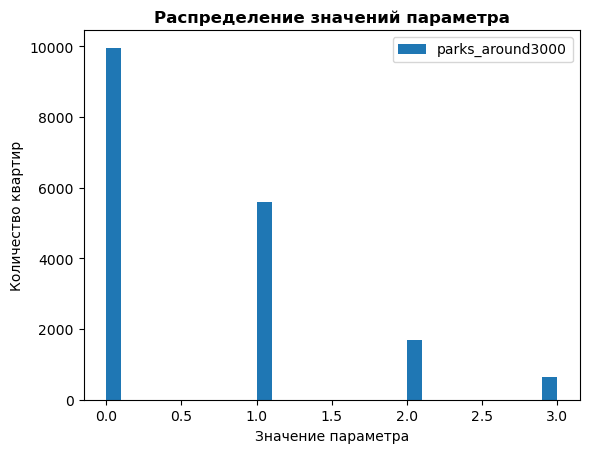

Число корзин в гистограмме:  30

[0.0, 1.0, 2.0, nan, 3.0]


In [49]:
raw(data['parks_around3000'])

In [51]:
# считаю количество объявлений без парков
len(data[data['parks_around3000']==0]) + len(data[data['parks_around3000'].isna()])

15443

***Вывод: гистограммы по данным столбца выглядит правдоподобно. Скорее всего там, где не указаны данные, там просто нет рядом ни одного парка и продавец проигнорировал данный пункт. Оставил без изменений***

#### 2.1.11 Параметр "Расстояние до ближайшего парка" <a id="to2111"></a>

[Содержание](#to)

Количество пропусков в столбце:  15439
Процент пропусков в столбце: 66.0%
Минимальное значение:  1.0
Максимальное значение:  3190.0


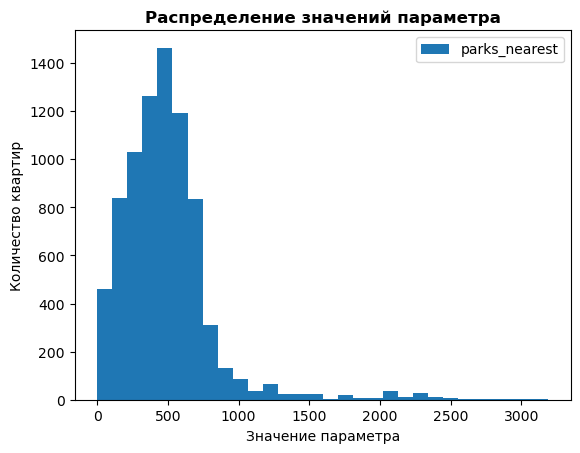

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [52]:
raw(data['parks_nearest'])

In [53]:
# привожу значения таблицы к целому числу
data['parks_nearest'] = data['parks_nearest'][data['parks_nearest']>=0].astype('int')

In [54]:
# считаю сколько строк осталось после предобработки
len(data)

23383

***Вывод: по логике там, где не указаны параметры расстояние, там парков рядом нет. Тем более что данные коррелируют с данными о количестве парков рядом с домом. Пустых и нулевых значений одинаково. Пропуски оставил. Убрал десятые из значений, все числа перевёл в целые.***

#### 2.1.12 Параметр "Число водоёмов в радиусе 3 км" <a id="to2112"></a>

[Содержание](#to)

Количество пропусков в столбце:  5482
Процент пропусков в столбце: 23.4%
Минимальное значение:  0.0
Максимальное значение:  3.0


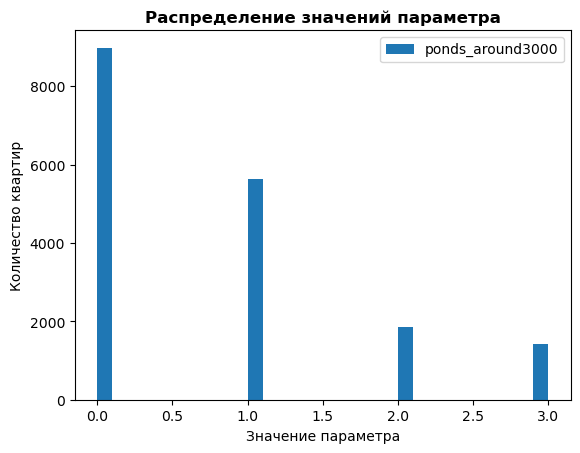

Число корзин в гистограмме:  30

[0.0, 1.0, 2.0, 3.0, nan]


In [55]:
raw(data['ponds_around3000'])

In [56]:
# количество объявлений без прудов
len(data[data['ponds_around3000']==0]) + len(data[data['ponds_around3000'].isna()])

14461

***Вывод: нет водоёмов нет данных, либо ноль. Посчитал объявления без водоёмов и оставил всё как есть.***

#### 2.1.13 Параметр "Расстояние до ближайшего водоёма" <a id="to2113"></a>

[Содержание](#to)

Количество пропусков в столбце:  14461
Процент пропусков в столбце: 61.8%
Минимальное значение:  13.0
Максимальное значение:  1344.0


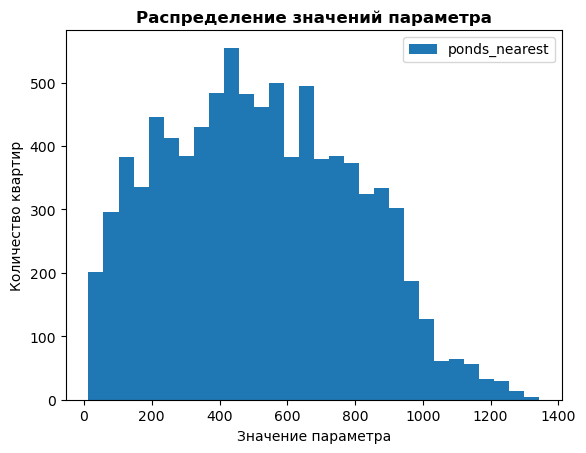

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [57]:
raw(data['ponds_nearest'])

In [58]:
# привожу значения таблицы к целому числу
data['ponds_nearest'] = data['ponds_nearest'][data['ponds_nearest']>=0].astype('int')

***Вывод: выводы совпадают с выводами по прудам. данные не указаны там, где рядом прудов нет. Количество таких объявлений совпадает. Все значения привёл к целому числу. Пропуски оставил.***

#### 2.1.14 Параметр "Дата размещения объявления" <a id="to2114"></a>

[Содержание](#to)

In [59]:
# вывожу на экран первые строку столбца
print(data['first_day_exposition'].head(10))

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object


In [60]:
# перевожу значения столбца в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
print(data['first_day_exposition'].head(10))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]


In [61]:
# количество пропусков в столбце
print(data['first_day_exposition'].isna().sum())

0


In [62]:
# период времени объявлений в столбце
print(data['first_day_exposition'].min(),'---',data['first_day_exposition'].max())

2014-11-27 00:00:00 --- 2019-05-03 00:00:00


In [63]:
#количество дней в периоде
print(data['first_day_exposition'].max()-data['first_day_exposition'].min())

1618 days 00:00:00


***Вывод: столбец содержал значения времени, но тип данных не соответствовал. В процессе предобработки изменил тип времени на datetime. И нашёл период в течении которого были размещены объявления из датафрейма.***

#### 2.1.15 Параметр "Сколько дней было размещено объявление до снятия" <a id="to2115"></a>

[Содержание](#to)

Количество пропусков в столбце:  3138
Процент пропусков в столбце: 13.4%
Минимальное значение:  1.0
Максимальное значение:  1580.0


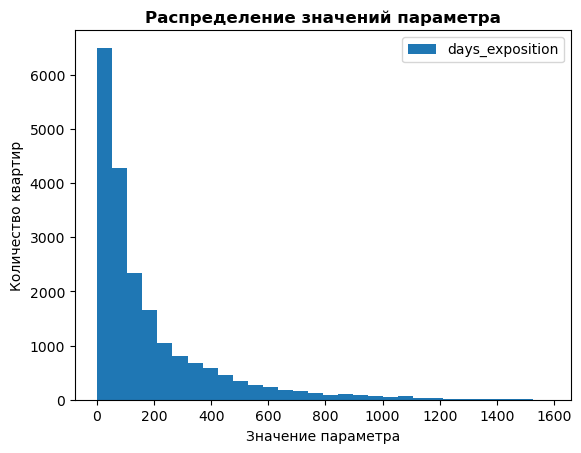

Число корзин в гистограмме:  30

Количество значений параметра больше  50


In [64]:
raw(data['days_exposition'])

In [65]:
#привожу значения таблицы к целому числу
data['days_exposition'] = data['days_exposition'][data['days_exposition']>=0].astype('int')

***Вывод: в данном столбце содержится информация о том сколько дней данное объявление было на сайте до снятия. Логично предположить если по объявлению нет данной информации, то оно ещё актуально.***

### 2.2 Добавление новых параметров <a id="to22"></a>

[Содержание](#to)

**Для более качественного и детального анализа необходимо выделить и  добавить новые параметры.**

#### 2.2.1 Новый столбец "Цена квадратного метра" <a id="to221"></a> 

In [66]:
# создал новы столбец со стоимостью квадратного метра квартиры из объявления
data['price_meter'] = data['last_price']/data['total_area']
data['price_meter'] = data['price_meter'].astype('int')

#### 2.2.2 Новый столбец "День недели публикации объявления" <a id="to222"></a>

In [67]:
# создал новый столбец с днём недели в который было размещено объявление
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#### 2.2.3 Новый столбец "Месяц публикации объявления" <a id="to223"></a>

In [129]:
# создал новый столбец с числом месяца, в который было размещено объявление
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### 2.2.4 Новый столбец "Год публикации объявления" <a id="to224"></a>

In [69]:
# создал новый столбец с годом в который было размещено объявление
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### 2.2.5  Новый столбец "Тип этажа квартиры" <a id="to225"></a>

In [130]:
# создаю столбец, где объявления будут разбиты по категориям: первый - первый этаж, последний - последний этаж, другой - остальные
# создаю копию столбца с номер этажа квартиры с новым названием 'floor_category'
data['floor_category'] = data['floor']

#### 2.2.6 Новый столбец "Расстояни до центра города в километрах" <a id="to226"></a>

In [131]:
# написал цикл, который переименовывает цифры нового столбца в категории согласно условиям
for ind in data['floor'].index:
    if data.loc[ind,'floor_category']==1:
        data.loc[ind,'floor_category'] = 'первый'
    elif data.loc[ind,'floor_category']==data.loc[ind,'floors_total']:
        data.loc[ind,'floor_category'] = 'последний'
    else:
        data.loc[ind,'floor_category'] = 'другой'

In [72]:
# проверяю результат
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [73]:
# перевожу значения столбца 'cityCenters_nearest' в километры и округляю до целых значений
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000)
data['cityCenters_nearest'] = data['cityCenters_nearest'][data['cityCenters_nearest']>=0].astype('int')

## 3. Исследовательский анализ данных <a id="to3"></a>

In [74]:
# создал собственную функцию с минимумом необходимых параметров для предстоящей задачи
def raw_min (df):
    print('Количество пропусков в столбце: ',df.isna().sum())
    print('Минимальное значение: ', df.min())
    print('Максимальное значение: ', df.max())
    df.plot(bins=30,kind='hist',legend=True)
    plt.title('Распределение значений параметра', fontsize= 12)
    plt.xlabel('Значение параметра')
    plt.ylabel('Количество квартир')
    plt.show()

### 3.1 Анализ параметров <a id="to31"></a>

#### 3.1.1 Оценка параметров столбца "Общая площадь" <a id="to311"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  12.0
Максимальное значение:  500.0


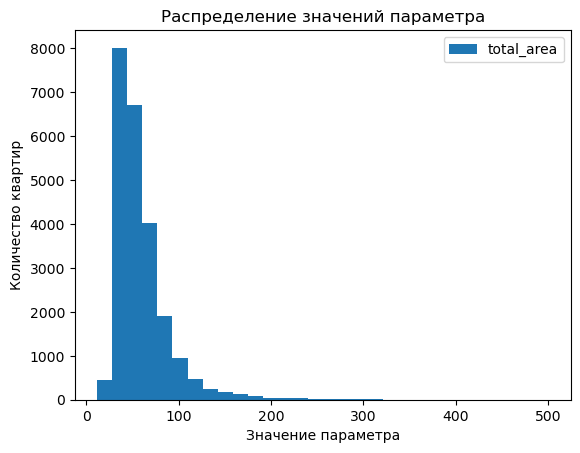

In [75]:
raw_min(data['total_area'])

***Наблюдение: основная масса квартир в диапазоне примерно от 30 до 90 м2. Квартир 200м2 и больше очень мало и стремится к нулю. Вид графика нормальный, аномалий в данных не видно.***

#### 3.1.2 Оценка параметров столбца "Жилая площадь" <a id="to312"></a>

[Содержание](#to)

Количество пропусков в столбце:  1858
Минимальное значение:  9.0
Максимальное значение:  200.0


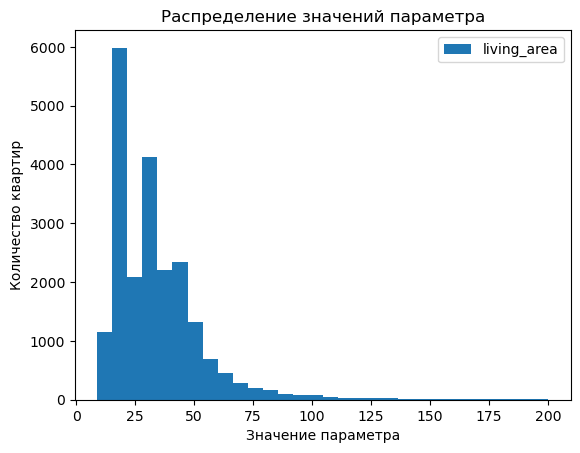

In [76]:
raw_min(data['living_area'])

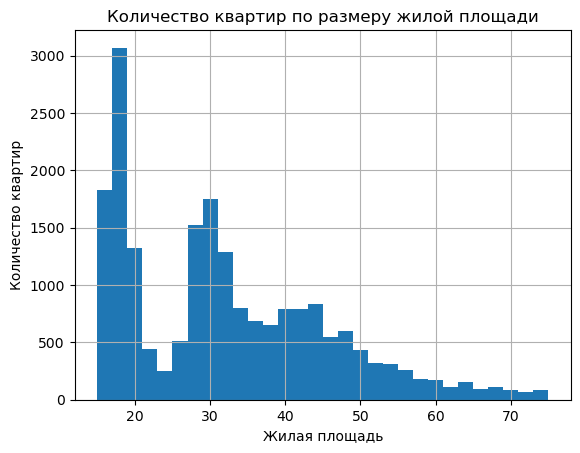

In [77]:
data['living_area'].hist(bins=30,range=(15,75))
plt.title('Количество квартир по размеру жилой площади')
plt.xlabel("Жилая площадь")
plt.ylabel("Количество квартир")
plt.show()

***Наблюдение: основная масса квартир в диапазоне от 10 до 70 м2 жилая площадь. Есть два аномальных пика. Нет объяснения, но есть версия, возможно в каком то сегменте квартир объединены и жилая и общие площади, из за этого получаются пики. Возможно это связано с данными по студиям.***

#### 3.1.3 Оценка параметров столбца "Площадь кухни" <a id="to313"></a>

[Содержание](#to)

Количество пропусков в столбце:  2204
Минимальное значение:  3.0
Максимальное значение:  50.0


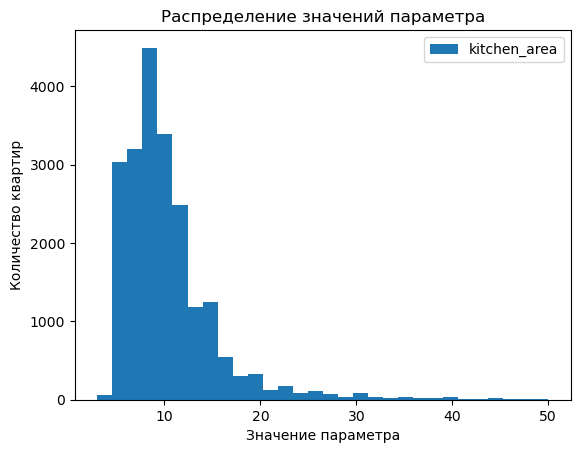

In [78]:
raw_min(data['kitchen_area'])

***Наблюдение: график выглядит нормально. Основные значения в диапазоне от 5 до 12 м2. Кухни обычно в этом диапазоне и бывают. В районе 9м2 пик. В стране много советской стандартной застройки, 8-9 м2, стандартное значение для советской застройки. Аномалий не вижу.***

#### 3.1.4 Оценка параметров столбца "Цена на момент снятия публикации" <a id="to314"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  12190.0
Максимальное значение:  330000000.0


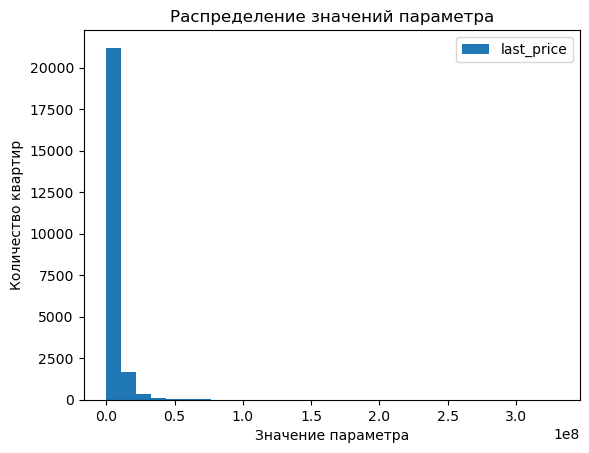

In [79]:
raw_min(data['last_price'])

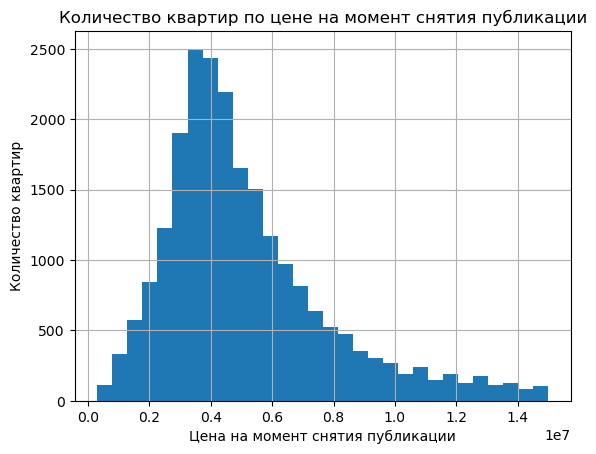

In [80]:
data['last_price'].hist(bins=30, range=(300000,15000000))
plt.title('Количество квартир по цене на момент снятия публикации')
plt.xlabel("Цена на момент снятия публикации")
plt.ylabel("Количество квартир")
plt.show()

In [81]:
# сделал срез по основной массе данных, удалил выбросы из датафрейма
data = data.query('300000<last_price<15000000')
len(data)

22225

Количество пропусков в столбце:  0
Минимальное значение:  430000.0
Максимальное значение:  14999999.0


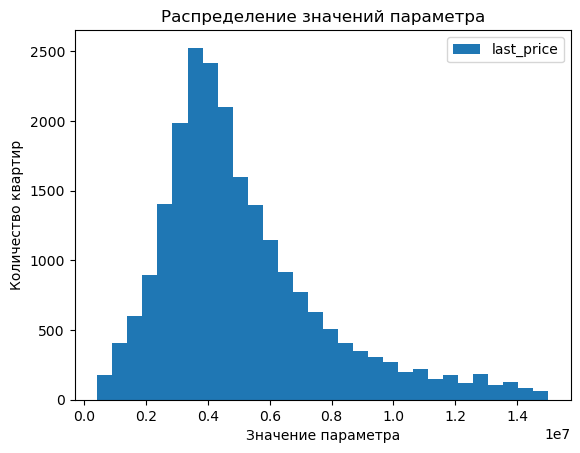

In [82]:
raw_min(data['last_price'])

***Наблюдение: график стандартный. Аномалий нет. Есть очень большие значения, которые могут повлиять негативно на результаты исследования. Удалил лишнее оставил основную массу данных без больших значений.***

#### 3.1.5 Оценка параметров столбца "Число комнат" <a id="to315"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  0
Максимальное значение:  7


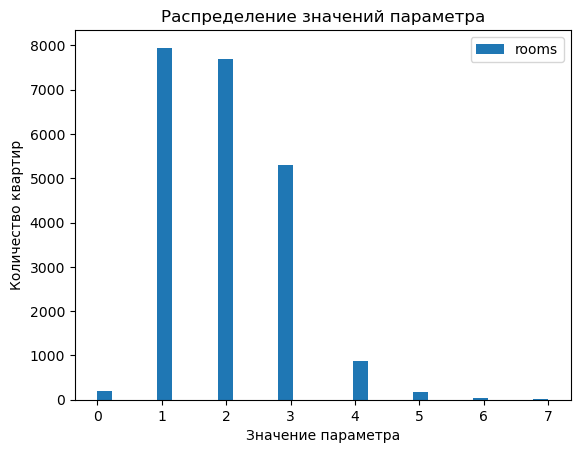

In [83]:
raw_min(data['rooms'])

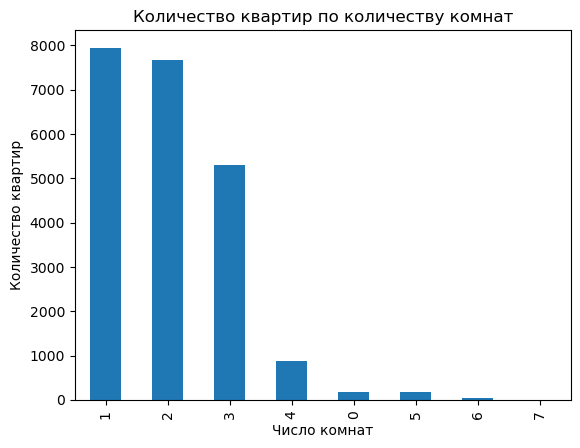

In [84]:
# оцениваю основной объём данных
data['rooms'].value_counts().plot(kind='bar')
plt.title('Количество квартир по количеству комнат')
plt.xlabel("Число комнат")
plt.ylabel("Количество квартир")
plt.show()

In [85]:
# удаляю крайние маленькие значения 
data = data.query('0<rooms<5')
len(data)

21813

***Наблюдение: стандартный график с малым количеством аномально больших значений. Могу предположить, что 16 комнат вполне себе может быть, но таких значений единицы. Основная масса в диапазоне от 1 до 4 комнат. Удалил лишние значения. При этом основная масса данных осталась.***

#### 3.1.6 Оценка параметров столбца "Высота потолков" <a id="to316"></a>

[Содержание](#to)

Количество пропусков в столбце:  8477
Минимальное значение:  2.0
Максимальное значение:  4.2


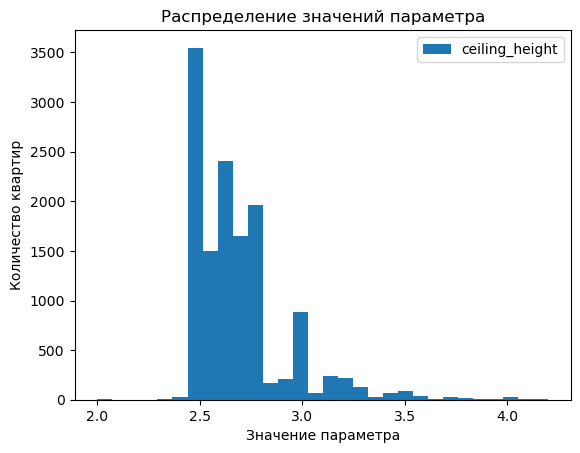

In [86]:
raw_min(data['ceiling_height'])

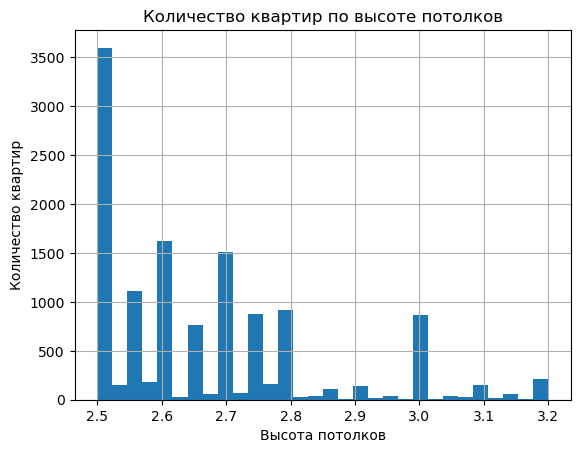

In [87]:
# оценка основной массы данных
data['ceiling_height'].hist(bins=30, range=(2.5,3.2))
plt.title('Количество квартир по высоте потолков')
plt.xlabel("Высота потолков")
plt.ylabel("Количество квартир")
plt.show()

In [88]:
data = data[data['ceiling_height'].between(0,3.1) | data['ceiling_height'].isna()]
len(data)

21065

***Наблюдение: высота потолков обычно величина стандартная определяющаяся нормами строительства. Большой и несколько малых рядом пиков этим и определены. Есть отклонения, это думаю либо ошибка заполнения данных, либо нестандартное строительство по индивидуальному проекту, что тоже бывает. Так как отклонений мало, я убрал лишнее.***

#### 3.1.7 Оценка параметров столбца "Этаж" <a id="to317"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  1
Максимальное значение:  27


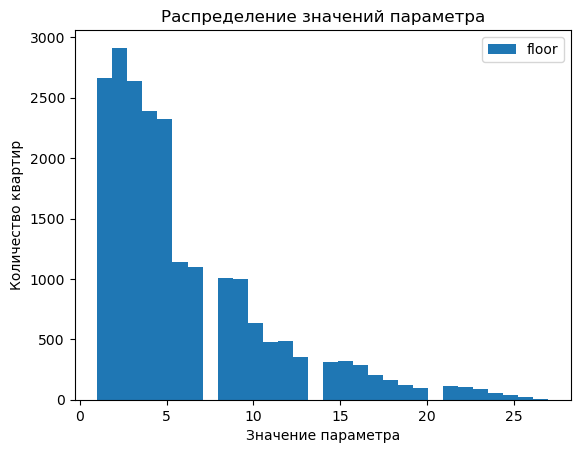

In [89]:
raw_min(data['floor'])

In [90]:
data = data[data['floor'].between(0,18) | data['ceiling_height'].isna()]
len(data)

20739

***Наблюдение: график без аномалий. В стране большое наследие советской эпохи. Это пяти и девятиэтажки. Ввиду бума строительства последних лет и многоэтажки тоже представлены не плохо. Решил удалить высокие значения на 18 этажах. Сильно данные не пострадали.***

#### 3.1.8 Оценка параметров столбца "Категория этажей" <a id="to318"></a>

[Содержание](#to)

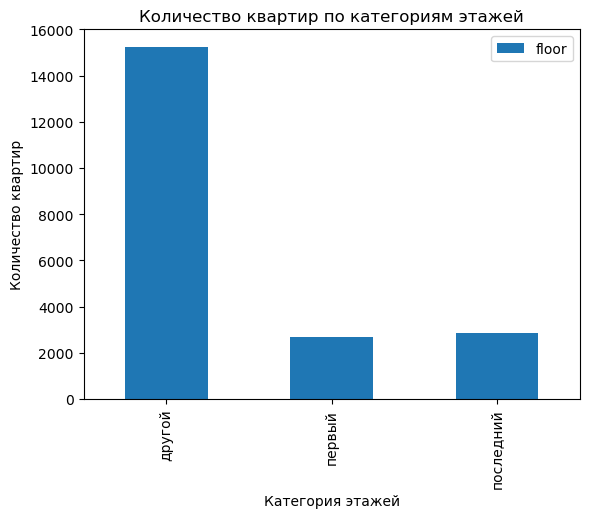

In [91]:
data.pivot_table(index=['floor_category'], values=['floor'],aggfunc='count').plot(kind='bar')
plt.title('Количество квартир по категориям этажей')
plt.xlabel("Категория этажей")
plt.ylabel("Количество квартир")
plt.show()

***Наблюдения: ничего аномального не вижу. естественно первых и последних этажей меньше, чем всех остальных.***

#### 3.1.9 Оценка параметров столбца "Всего этажей в доме" <a id="to319"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  1.0
Максимальное значение:  29.0


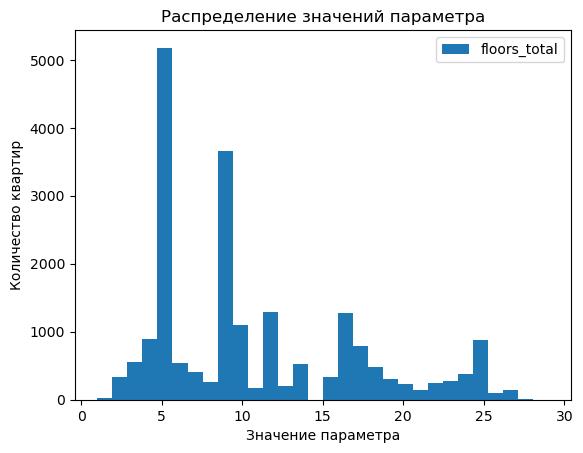

In [92]:
raw_min(data['floors_total'])

***Наблюдение: обычный график без аномалий. В корреляции с предыдущим графиком, возник вопрос, почему продающихся на высоких этажах квартир меньше, хотя таких домов довольно много. Предположу что высокоэтажки выше 16 этажей это совсем свежие дома, в которых квартиры купили совсем недавно. Продавать квартиру сразу после покупки будет не так много людей. В основном инвесторы оставляют данные в столбике без изменений. График выглядит вполне полноценно.***

#### 3.1.10 Оценка параметров столбца "Расстояние до центра города" <a id="to3110"></a>

[Содержание](#to)

Количество пропусков в столбце:  5282
Минимальное значение:  0.0
Максимальное значение:  65.0


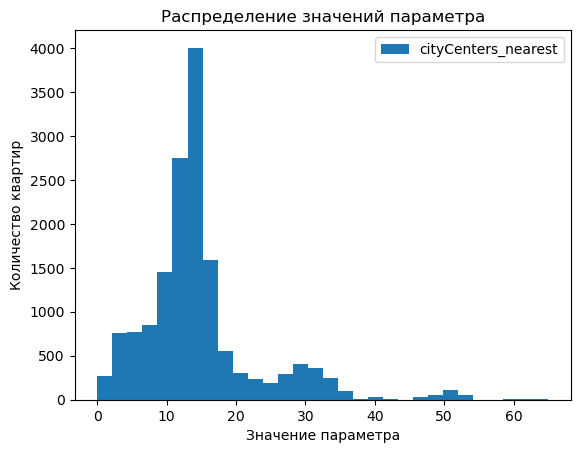

In [93]:
raw_min(data['cityCenters_nearest'])

In [94]:
data = data[data['cityCenters_nearest'].between(0,40) | data['ceiling_height'].isna()]
len(data)

17762

***Наблюдение: график в целом выглядит правдоподобно. Два небольших пика это скорей всего населённые города спутники, которые находятся на не очень большом расстоянии от города и при это учитываются системой. Но это только версия. Пики не настолько большие чтобы считать их за аномалии.***

#### 3.1.11 Оценка параметров столбца "Расстояние до аэропорта" <a id="to3111"></a>

[Содержание](#to)

Количество пропусков в столбце:  2505
Минимальное значение:  0.0
Максимальное значение:  78.0


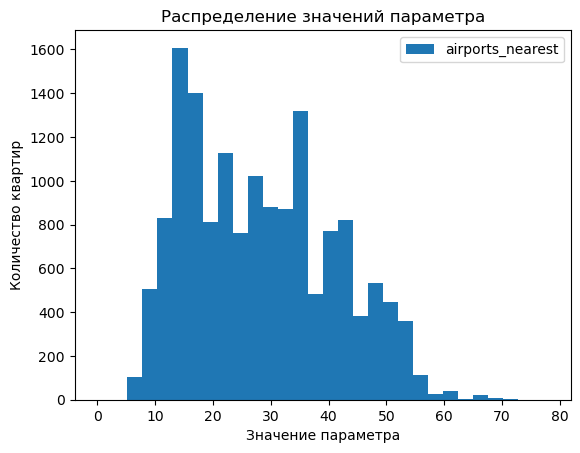

In [95]:
raw_min(data['airports_nearest'])

***Наблюдение: нормальный график без аномалий. Жилые массивы расположены не равномерно, есть жилые кварталы, есть промышленные зоны. Зубцы на таком графике не аномалия.***

#### 3.1.12 Оценка параметров столбца "Расстояние до ближайшего парка" <a id="to3112"></a>

[Содержание](#to)

Количество пропусков в столбце:  11422
Минимальное значение:  1.0
Максимальное значение:  3190.0


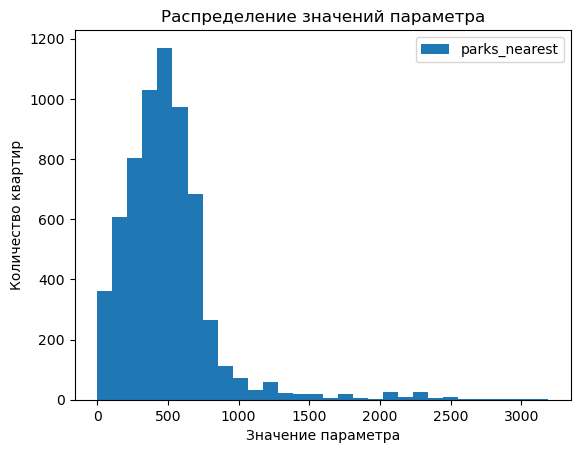

In [97]:
raw_min(data['parks_nearest'])

***Наблюдение: нормальный график без аномалий.***

#### 3.1.13 Оценка параметров столбца "День недели размещения объявления" <a id="to3113"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  0
Максимальное значение:  6


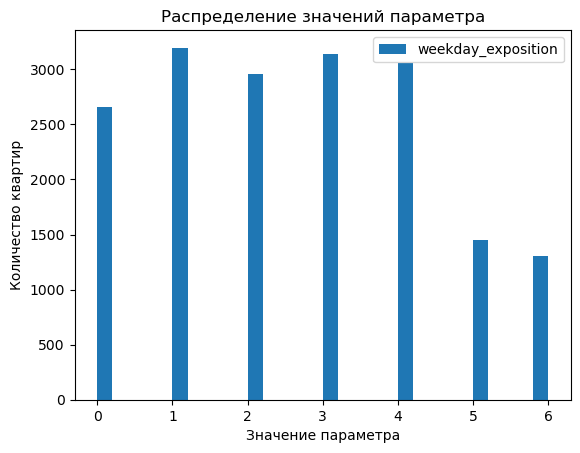

In [98]:
raw_min(data['weekday_exposition'])

***Наблюдение: график без аномалий. Вывод только один. В выходные люди отдыхают и им не особо хочется заниматься делами. Поэтому размещений объявлений в выходные меньше, чем в будние дни.***

#### 3.1.14 Оценка параметров столбца "Месяц размещения объявления" <a id="to3114"></a>

[Содержание](#to)

Количество пропусков в столбце:  0
Минимальное значение:  1
Максимальное значение:  12


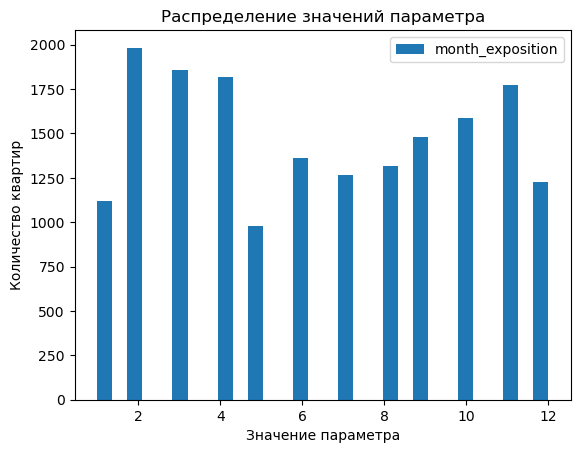

In [99]:
raw_min(data['month_exposition'])

***Наблюдение: судя по графику пик размещения объявлений приходится на конец зимы и начало весны, а так же на конец осени.***

#### 3.1.15 Проверка данных после корректировки <a id="to3115"></a>

[Содержание](#to)

In [100]:
# проверка данных после корректировки, пропусков нет, информации осталось самый сок
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17762 entries, 0 to 23697
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17762 non-null  int64         
 1   last_price            17762 non-null  float64       
 2   total_area            17762 non-null  float64       
 3   first_day_exposition  17762 non-null  datetime64[ns]
 4   rooms                 17762 non-null  int64         
 5   ceiling_height        9285 non-null   float64       
 6   floors_total          17762 non-null  float64       
 7   living_area           16329 non-null  float64       
 8   floor                 17762 non-null  int64         
 9   is_apartment          17762 non-null  bool          
 10  studio                17762 non-null  bool          
 11  open_plan             17762 non-null  bool          
 12  kitchen_area          16180 non-null  float64       
 13  balcony         

### 3.2 Оценка времени продажи квартиры <a id="to32"></a>

[Содержание](#to)

Количество пропусков в столбце:  1976
Минимальное значение:  1.0
Максимальное значение:  1553.0


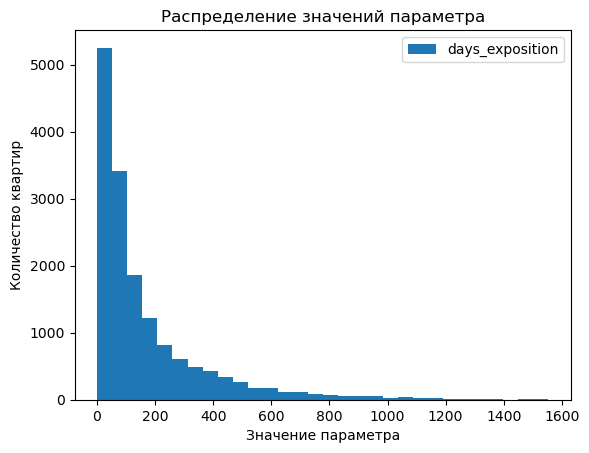

In [101]:
# изучаю значения столбца 'days_exposition'
# выводипм гистограмму с посощбю собственной функции raw_min
raw_min(data['days_exposition'])

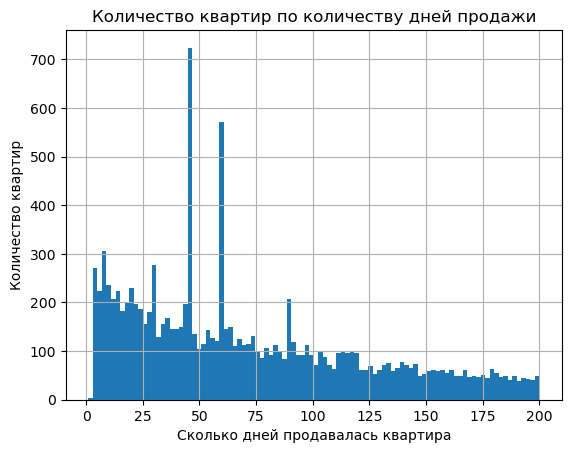

In [102]:
# смотрим на графике основной массив данных
data['days_exposition'].hist(bins=100,range=(1,200))
plt.title('Количество квартир по количеству дней продажи')
plt.xlabel("Сколько дней продавалась квартира")
plt.ylabel("Количество квартир")
plt.show()

In [103]:
# проверяем какие значения входят в аномальные пики
data['days_exposition'].value_counts().head()

45.0    646
60.0    478
7.0     186
30.0    178
4.0     141
Name: days_exposition, dtype: int64

In [104]:
# пытаюсь найти закономерности в таблице связанные с пиками по срезу
data[data['days_exposition']==45].head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category
78,9,4350000.0,37.00,2018-02-22,1,NaN,19.0,18.0,6,False,...,0.0,NaN,0.0,NaN,45.0,117567,3,2,2018,другой
110,6,3850000.0,72.30,2017-09-29,2,NaN,3.0,27.4,2,False,...,NaN,NaN,NaN,NaN,45.0,53250,4,9,2017,другой
153,12,4350000.0,55.00,2017-05-21,2,2.57,9.0,31.2,2,False,...,1.0,589.0,0.0,NaN,45.0,79090,6,5,2017,другой
158,15,3100000.0,47.30,2017-11-07,2,NaN,5.0,27.5,2,False,...,NaN,NaN,NaN,NaN,45.0,65539,1,11,2017,другой
166,0,2300000.0,60.00,2017-12-02,2,NaN,3.0,NaN,1,False,...,NaN,NaN,NaN,NaN,45.0,38333,5,12,2017,первый
189,0,6150000.0,62.00,2017-10-13,3,NaN,9.0,41.5,5,False,...,1.0,10.0,0.0,NaN,45.0,99193,4,10,2017,другой
210,4,4300000.0,58.50,2016-06-15,2,NaN,9.0,28.7,7,False,...,0.0,NaN,1.0,353.0,45.0,73504,2,6,2016,другой
289,11,3150000.0,33.00,2017-06-05,1,NaN,6.0,18.0,4,False,...,0.0,NaN,0.0,NaN,45.0,95454,0,6,2017,другой
322,6,2000000.0,25.00,2017-02-07,1,NaN,5.0,NaN,5,False,...,NaN,NaN,NaN,NaN,45.0,80000,1,2,2017,последний
340,13,3200000.0,32.20,2017-06-15,1,2.65,9.0,19.0,5,False,...,1.0,451.0,0.0,NaN,45.0,99378,3,6,2017,другой


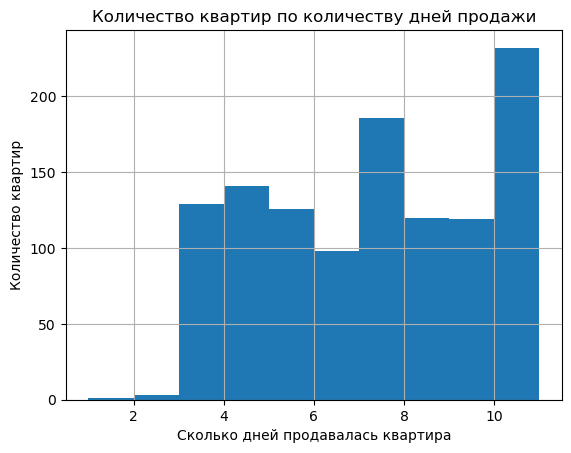

In [105]:
# смотрю срез минимальных значений на графике
data['days_exposition'].hist(bins=10,range=(1,11))
plt.title('Количество квартир по количеству дней продажи')
plt.xlabel("Сколько дней продавалась квартира")
plt.ylabel("Количество квартир")
plt.show()

In [106]:
# создаю отдельный дф без нулей
# проверяю сколько строк осталось
data_nonull = data[data['days_exposition']!=0]
len(data_nonull)

17762

In [107]:
# создаю отдельный дф без пиковых значений
# проверяю сколько строк осталось
data_norm = data_nonull[(data_nonull['days_exposition']!=45) & (data['days_exposition']!=60)]
len(data_norm)

16638

In [132]:
# считаю среднее арифметическое и медианное по дф без нулей и дф без нулей и пиков
data_nonull['days_exposition'].mean()

169.3615862156341

In [109]:
data_norm['days_exposition'].mean()

178.40622016096032

In [110]:
data_nonull['days_exposition'].median()

90.0

In [111]:
data_norm['days_exposition'].median()

100.0

In [112]:
# числовое описание полученных данных
data_norm['days_exposition'].describe()

count    14662.000000
mean       178.406220
std        215.009971
min          1.000000
25%         38.000000
50%        100.000000
75%        228.000000
max       1553.000000
Name: days_exposition, dtype: float64

***Вывод: во время анализа значений столбца 'days_exposition' выяснилось что в данных много нулей. Скорее всего это строки объявлений которые всё ещё актуальны. При расчёте эти данные не должны учитываться. Так же были обнаружены два аномальных пика, 45 и 60 дней. На эти дни приходится аномальный скачок продаж. Так как никаких закономерностей не было найдено, думаю что это связано с какими то сроками регистрации права собственности. Возможно за этот период находится покупатель, но сделка не может быть совершена пока документы не будут оформлены. Это версия. В любом случае эти пики влияют на медианную и на среднее арифметическое. Что и было доказано при расчётах. Без пиков значение среднего арифметического отличается на 10 единиц, а медианное на 12. Это существенно. Причём среднее арифметическое сильно отличается от медианного значения. Считаю что нужно признать обычным временем продажи квартиры 103 дня. Самая быстрая продажа зафиксирована по истечении 1 дня. Но таких продаж крайне мало и их можно признать аномальными значениями. Существенный прирост начинается с 3 дня. Поэтому следует признать минимально возможным днём продажи третий день. Аномально максимальный срок продажи был зафиксирован в количестве 1580 дней. Согласно данным межквартильного размаха быстрыми продажами можно считать продажи произошедшие до 38 дней, а долгими, продажи которые произошли после 228 дней размещения объявления.***

### 3.3 Оценка факторов влияющих на стоимость квартиры <a id="to33"></a>

[Содержание](#to)

In [113]:
# функция для количественных параметров, находит коэффициент Пирсона и строит график корреляции
def cor(param):
    print(data['last_price'].corr(data[param]))
    data.plot(x='last_price',y=param,kind='scatter',alpha=0.03)
    plt.title('График зависимости двух параметров')

0.756688749578154


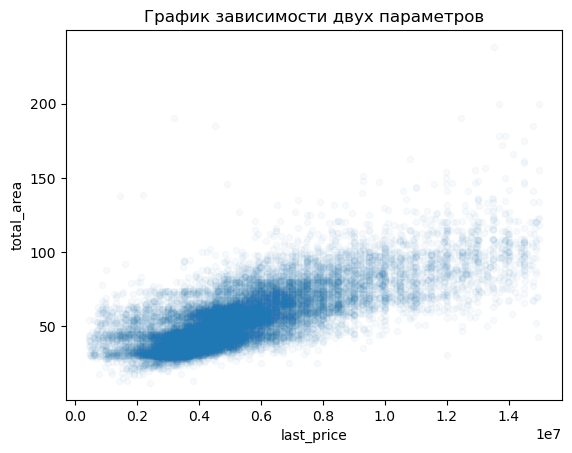

In [114]:
#  оценка зависимости цены квартиры от общей площади
cor('total_area')

0.6305144492815019


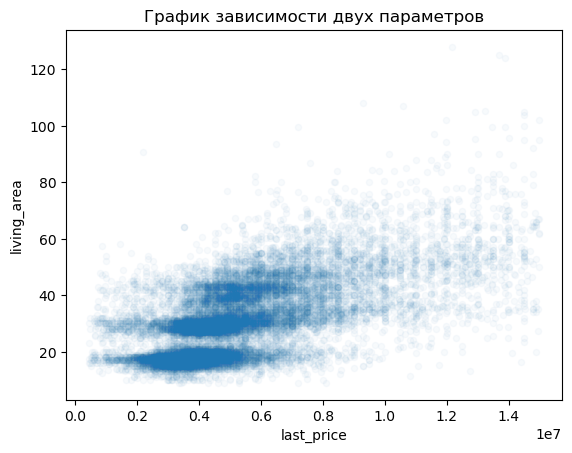

In [115]:
#  оценка зависимости цены квартиры от жилой площади
cor('living_area')

0.5468365465097078


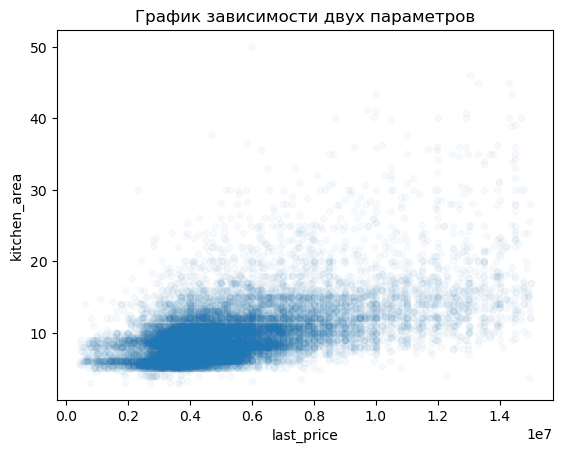

In [116]:
#  оценка зависимости цены квартиры от площади кухни
cor('kitchen_area')

0.47265349592980943


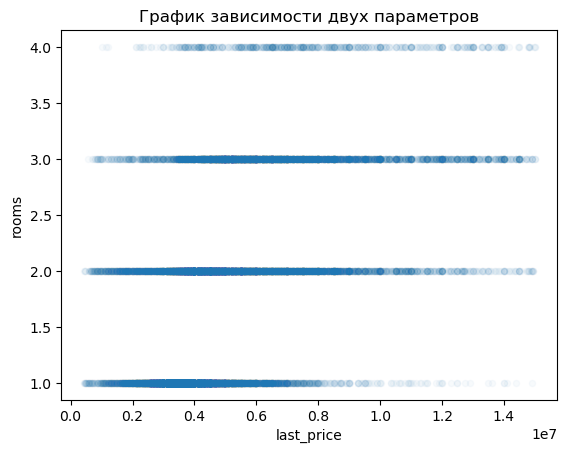

In [117]:
#  оценка зависимости цены квартиры от количества комнат
cor('rooms')

<function matplotlib.pyplot.show(close=None, block=None)>

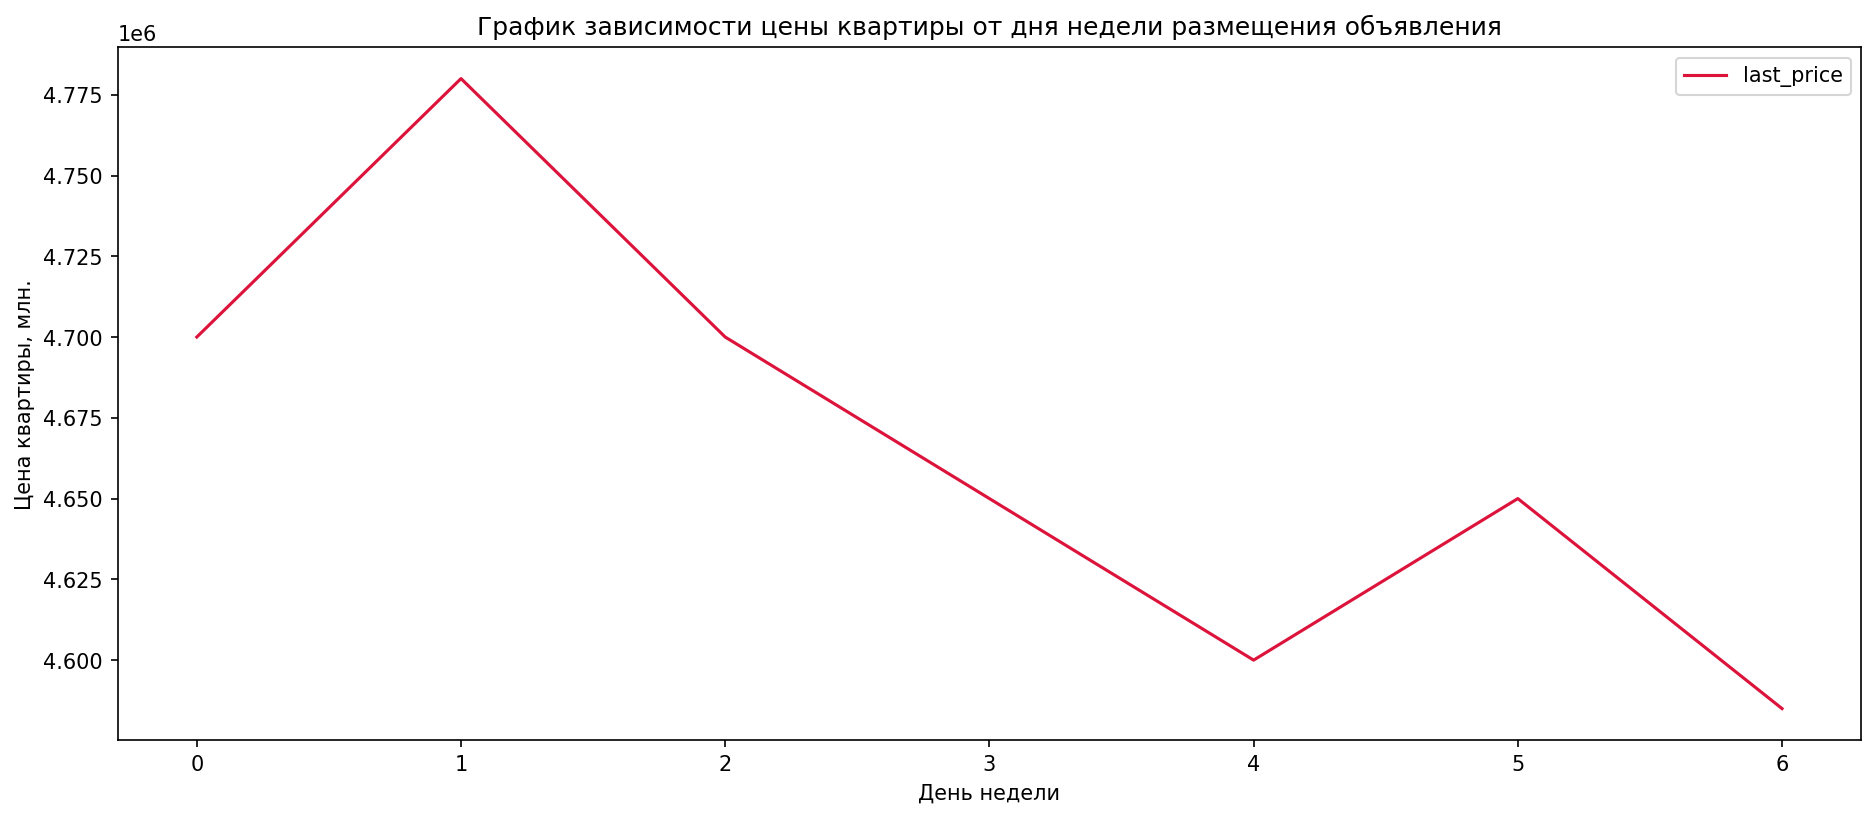

In [118]:
#  оценка зависимости цены квартиры от дня недели размещения объявления
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
got = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
got.plot(ax=ax, color='crimson')
plt.title('График зависимости цены квартиры от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

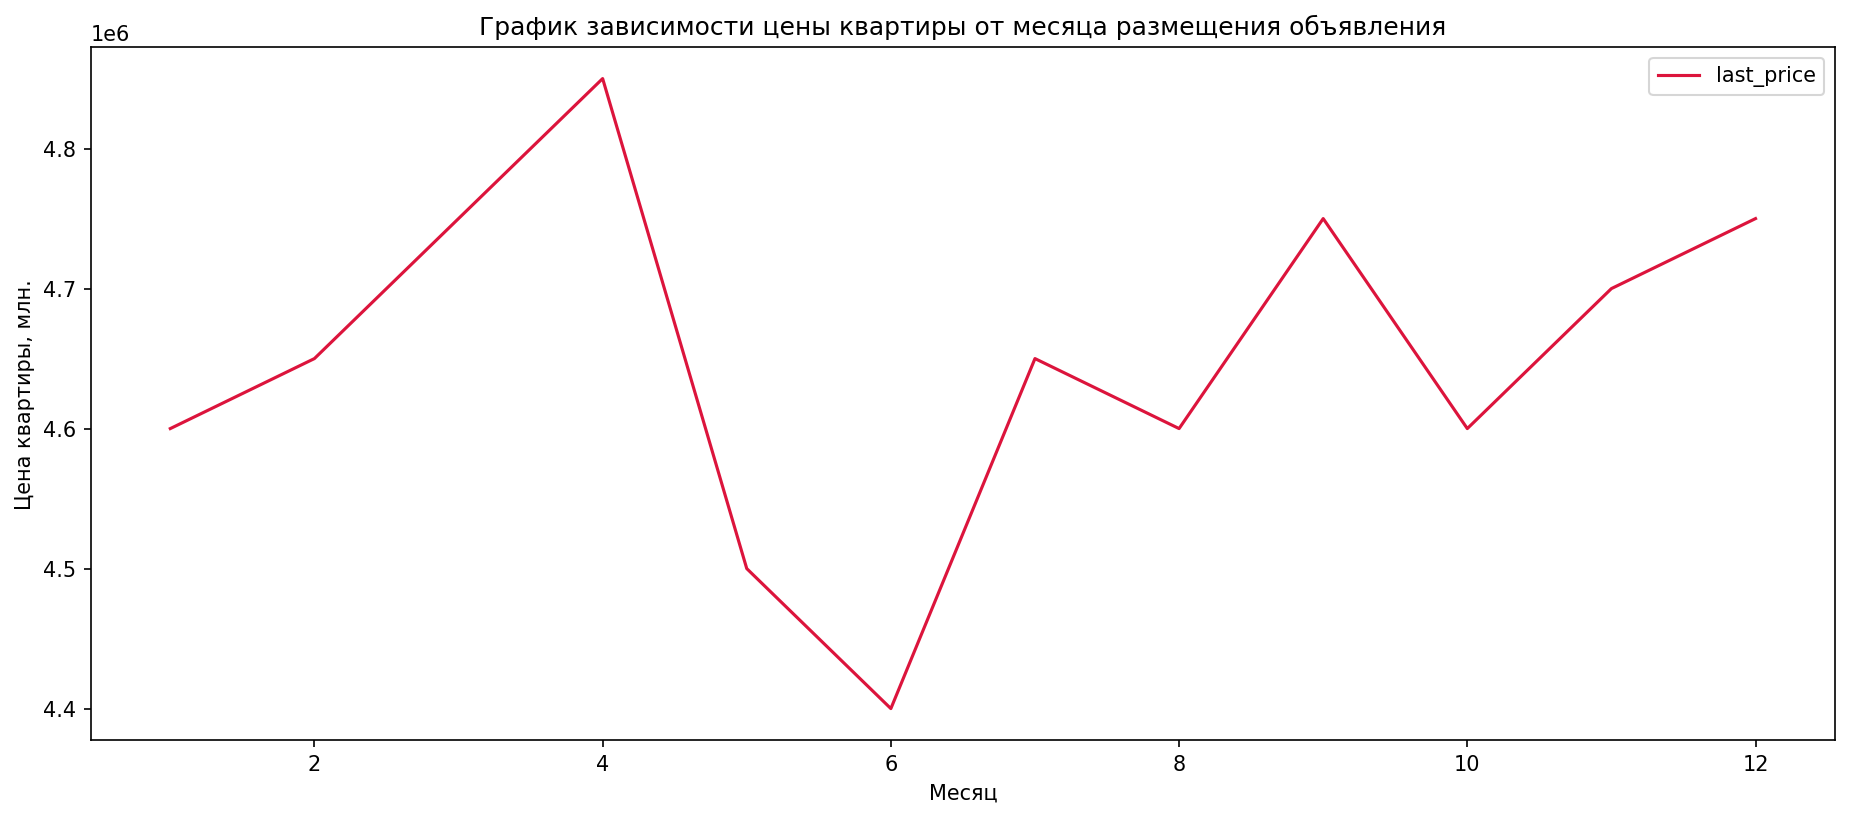

In [119]:
#  оценка зависимости цены квартиры от месяца размещения объявления
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
got = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
got.plot(ax=ax, color='crimson')
plt.title('График зависимости цены квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн.')
plt.show

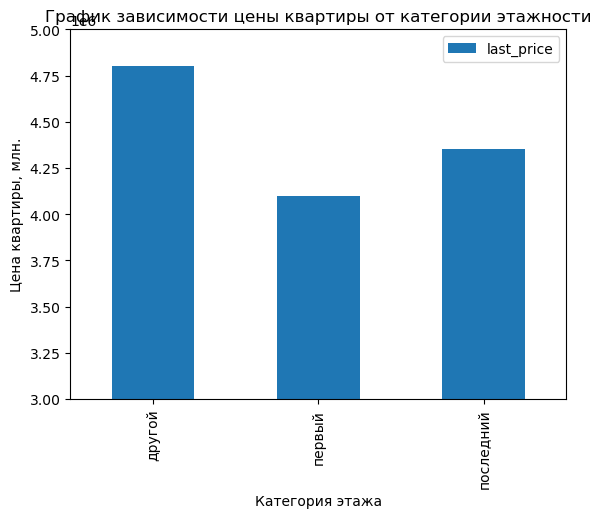

In [120]:
#  оценка зависимости цены квартиры от категории этажа квартиры
got = data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
got.plot(kind='bar')
plt.ylim(3000000, 5000000)
plt.title('График зависимости цены квартиры от категории этажности')
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, млн.')
plt.show()

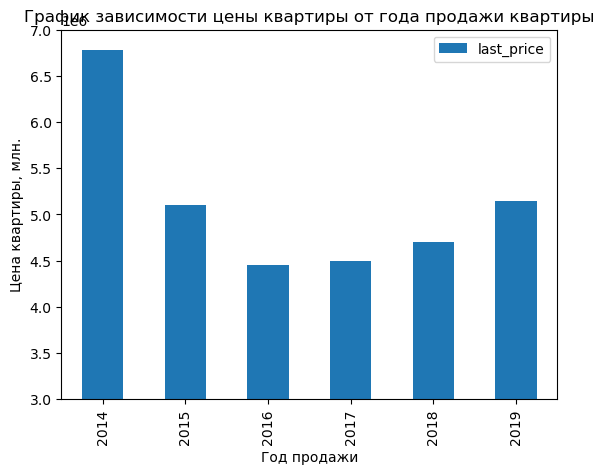

In [121]:
#  оценка зависимости цены квартиры от категории год продажи
got = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
got.plot(kind='bar')
plt.ylim(3000000, 7000000)
plt.title('График зависимости цены квартиры от года продажи квартиры')
plt.xlabel('Год продажи')
plt.ylabel('Цена квартиры, млн.')
plt.show()

***Вывод: провёл исследование параметров: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, день недели размещения и месяц размещения объявления. Наибольшую зависимость цена квартиры показала от общей площади квартиры. Так же есть не сильная но всё же зависимость от параметра жилая площадь квартиры. Не особо высокая корреляция скорее всего вызвана тем что есть дополнительные параметры в частности общая площадь квартиры от которых цена зависит больше. На графике зависимости цены от количества комнат, видна ощутимая зависимость между категориями 'одна комната' и 'две и больше'. Между двумя комнатами и больше зависимости практически нет. Так же видна небольшая зависимость от этажа, первый и последний этажи стоят дешевле. Последний график по годам показывает яму. Объясняется кризисом 2014 года. Цены стали падать в цене и после восстановления экономики, пошла обратная коррекция. По остальным параметрам из исследования зависимость не прослеживается.***

### 3.4 Средняя цена квадратного метра в ТОП-10 населённых пунктов <a id="to34"></a>

[Содержание](#to)

In [122]:
# создаём сводну таблицу из топ десяти населённых пунктов
# считаем количество объявлений и среднюю стоимость квартиры
# выделяем населённые пункты с самой высокой и самой низкой стоимостью квартиры
data.groupby('locality_name').agg(count=('locality_name', 'count'),price=('price_meter', 'mean'))\
    .sort_values(by='count', ascending=False).head(10).astype('int').style.highlight_max('price', color='orange')\
        .highlight_min('price', color='lime')

,count,price
locality_name,,
санкт-петербург,13154,106568
посёлок шушары,423,78226
посёлок мурино,334,84063
пушкин,331,100939
колпино,326,75501
посёлок парголово,290,89930
кудрово,261,94496
петергоф,174,83489
сестрорецк,171,100314


### 3.5 Средняя цена километра до центра города <a id="to35"></a>

[Содержание](#to)

In [123]:
# сортирую строки по городу
# строю сводную таблицу по цене квадратного метра
data_piter = data[data['locality_name']=='санкт-петербург']\
      .pivot_table(index='cityCenters_nearest', values='price_meter').astype('int')
data_piter

,price_meter
cityCenters_nearest,
0.0,117730
1.0,125682
2.0,113287
3.0,114299
4.0,123906
5.0,125777
6.0,124702
7.0,121153
8.0,114470


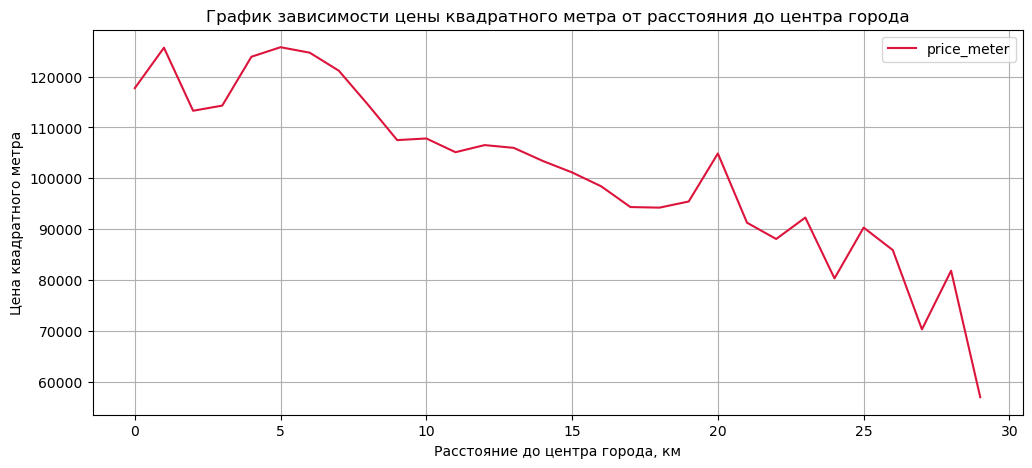

In [124]:
# визаулизирую на графике результаты
data_piter.plot(grid=True, figsize=(12, 5),color='crimson')
plt.title('График зависимости цены квадратного метра от расстояния до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена квадратного метра')
plt.show()

***Вывод: в целом динамика к уменьшению цены квадратного метра в зависимости от удалённости от центра города. В самом центре цена метра квадратного немного даже ниже чем на небольшом удалении. Это скорее всего связано с тем что в центре историческая застройка и строить нельзя. Элитные жк строятся на небольшом удалении и стоят дороже. Тем же можно объяснить небольшие пики цены на более дальнем расстоянии. Престижный район, удобная развязка, вот и небольшой рост цены в данном районе. Но в целом динамика падения цены однозначная. Разница между максимальным значением и минимальным практически в два раза.***

## 4. Общий вывод <a id="to4"></a>

[Содержание](#to)

***Исследование в принципе не открыло ничего необычного. Прослеживается чёткая закономерность между ценой на квартиру её площадью и местом расположения. Дополнительно выделяются более низкой ценой однокомнатные квартиры. Между двухкомнатными и более разница не столь ощутима. Так же меньше ценятся верхние и нижние этажи. Обращает на себя внимание сезонные всплески активности в продажах недвижимости в начале весны и в конце осени.***